<a href="https://colab.research.google.com/github/barish-bit/Time_Series_Forecasting_and_Error_Analysis_for_Climate_Data/blob/main/Analysis_the_model_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv("/content/test_output_1.csv")
df1.head()

,Unnamed: 0,observed,lin_predicted
0,0,29.3750,26.466680
1,1,29.8750,25.964884
2,2,29.9375,26.834659
3,3,29.9500,26.959391
4,4,29.5750,26.503248


In [ ]:
df2=pd.read_csv("/content/test_output_exp.csv")
df2.head()

,Unnamed: 0,observed,exp_predicted
0,0,29.3750,27.036839
1,1,29.8750,27.099120
2,2,29.9375,27.395967
3,3,29.9500,27.036782
4,4,29.5750,26.862022


In [ ]:
lin_pred=df1["lin_predicted"].tolist()
exp_pred=df2["exp_predicted"].tolist()
obs=df1["observed"].tolist()

In [ ]:
print(len(lin_pred))

1000


Average predictio

In [ ]:
avg_pred=[]
for i in range(len(lin_pred)):
  a=(lin_pred[i]+exp_pred[i])/2
  avg_pred.append(a)
print(avg_pred[4])
print(lin_pred[4])
print(exp_pred[4])

26.6826348603143
26.503247813623485
26.86202190700512


Understand the model performence in different clusters

In [ ]:
print(lin_pred)

[26.46668006486891, 25.96488370277353, 26.834659255337424, 26.95939140893321, 26.503247813623485, 26.309387581374505, 27.01031225272396, 26.55268436413089, 26.849984405749836, 26.76340557561369, 26.835433674383445, 26.336005369176583, 26.00397009321342, 25.63979799097908, 25.65372309844185, 26.278345606817982, 26.7261588778217, 26.255960210400552, 26.653726096049617, 26.735473804587357, 25.80298508001937, 25.792184070315976, 25.644006182965438, 25.34787762270736, 25.088742556804256, 25.02025399628389, 25.084447430002605, 25.142679491131037, 24.219981184812795, 24.39952327885287, 26.177199053768067, 26.455905283381288, 26.972505492776783, 26.45450827456112, 25.24957035223548, 26.027918076136544, 26.832272013612645, 27.142956219596, 26.967773926075743, 26.13672739956257, 26.639542732679388, 26.102789862057016, 26.909640833743904, 27.222254431835022, 27.456473702784272, 27.15729982406864, 27.163078417329213, 27.087115928616225, 26.73251491597298, 26.048898595766275, 25.600165515058208, 25

In [ ]:
c=lin_pred[0:100]
print(c)

[26.46668006486891, 25.96488370277353, 26.834659255337424, 26.95939140893321, 26.503247813623485, 26.309387581374505, 27.01031225272396, 26.55268436413089, 26.849984405749836, 26.76340557561369, 26.835433674383445, 26.336005369176583, 26.00397009321342, 25.63979799097908, 25.65372309844185, 26.278345606817982, 26.7261588778217, 26.255960210400552, 26.653726096049617, 26.735473804587357, 25.80298508001937, 25.792184070315976, 25.644006182965438, 25.34787762270736, 25.088742556804256, 25.02025399628389, 25.084447430002605, 25.142679491131037, 24.219981184812795, 24.39952327885287, 26.177199053768067, 26.455905283381288, 26.972505492776783, 26.45450827456112, 25.24957035223548, 26.027918076136544, 26.832272013612645, 27.142956219596, 26.967773926075743, 26.13672739956257, 26.639542732679388, 26.102789862057016, 26.909640833743904, 27.222254431835022, 27.456473702784272, 27.15729982406864, 27.163078417329213, 27.087115928616225, 26.73251491597298, 26.048898595766275, 25.600165515058208, 25

In [ ]:
lin_pred_split=[]
for i in range(10):
  c=lin_pred[100*i:100*(i+1)]
  #print(c)
  lin_pred_split.append(c)
#print(lin_pred_split)


exp_pred_split=[]
for i in range(10):
  c=exp_pred[100*i:100*(i+1)]
  #print(c)
  exp_pred_split.append(c)
#print(exp_pred_split)


avg_pred_split=[]
for i in range(10):
  c=avg_pred[100*i:100*(i+1)]
  #print(c)
  avg_pred_split.append(c)
#print(avg_pred_split)



obs_split=[]
for i in range(10):
  c=obs[100*i:100*(i+1)]
  #print(c)
  obs_split.append(c)
#print(obs_split)

In [ ]:
print(obs[0])

29.375


In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse=[]
for i in range(len(obs_split)):
  m=mean_squared_error(obs_split[i],lin_pred_split[i])
  lin_mse.append(m)
#print(lin_mse)


exp_mse=[]
for i in range(len(obs_split)):
  m=mean_squared_error(obs_split[i],exp_pred_split[i])
  exp_mse.append(m)



avg_mse=[]
for i in range(len(obs_split)):
  m=mean_squared_error(obs_split[i],avg_pred_split[i])
  avg_mse.append(m)

In [ ]:
x=[]
for i in range(10):
  x.append(i+1)

Text(0, 0.5, 'MSE')

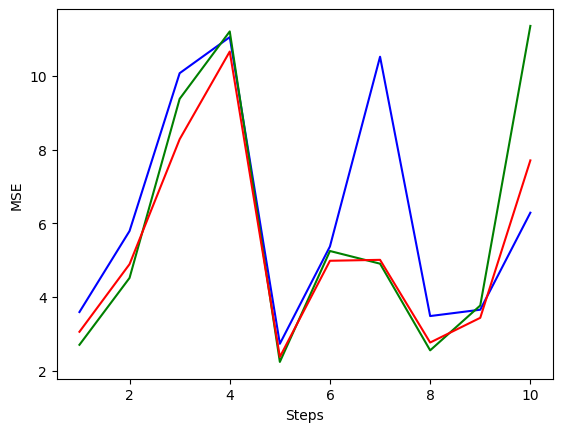

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,lin_mse,color="b")
plt.plot(x,exp_mse,color="g")
plt.plot(x,avg_mse,color="r")
plt.xlabel("Steps")
plt.ylabel("MSE")

In [ ]:
lin_avg=[]
for i in range(len(obs)):
  lin_avg.append(avg_pred[i]-lin_pred[i])

exp_avg=[]
for i in range(len(obs)):
  exp_avg.append(avg_pred[i]-exp_pred[i])

In [ ]:
x=[]
for i in range(1000):
  x.append(i+1)

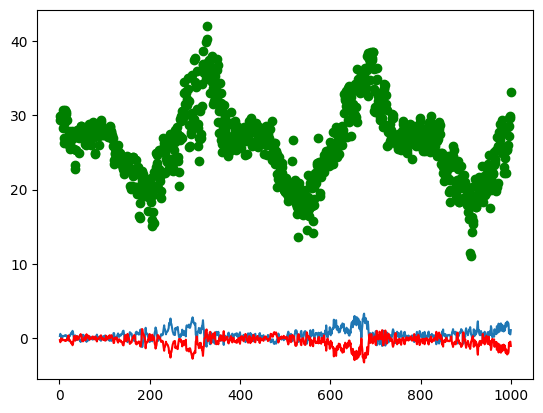

In [ ]:
plt.plot(x,lin_avg)
plt.plot(x,exp_avg,color="r")
plt.scatter(x,obs,color="g")

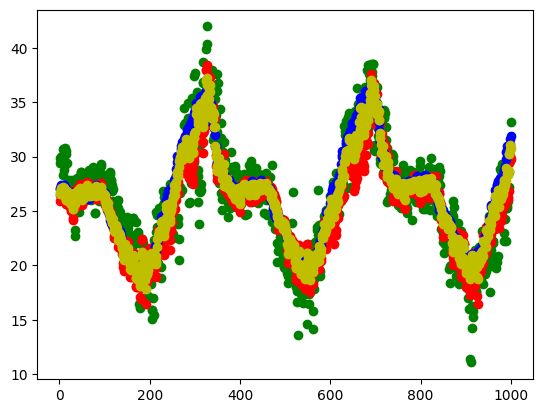

In [ ]:
plt.scatter(x,obs,color="g")
plt.scatter(x,lin_pred,color="r")
plt.scatter(x,exp_pred,color="b")
plt.scatter(x,avg_pred,color="y")

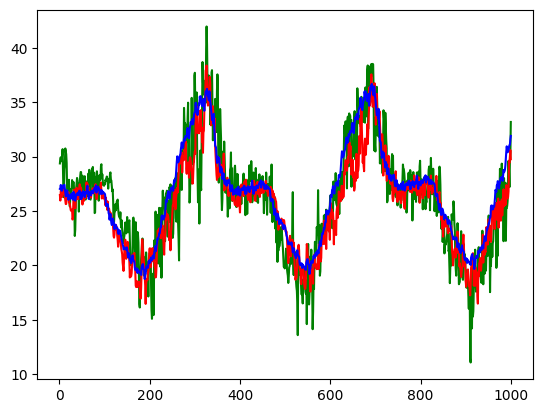

In [ ]:
plt.plot(x,obs,color="g")
plt.plot(x,lin_pred,color="r")
plt.plot(x,exp_pred,color="b")
#plt.plot(x,avg_pred,color="y")

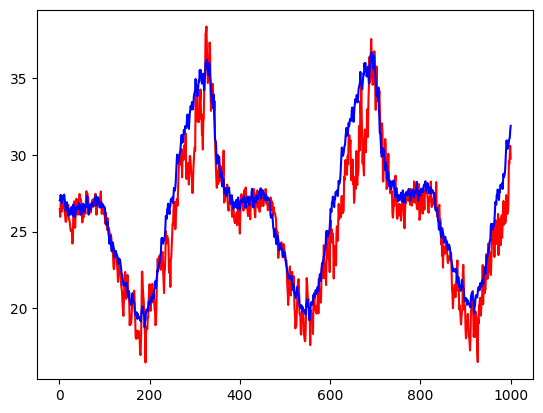

In [ ]:
#plt.plot(x,obs,color="g")
plt.plot(x,lin_pred,color="r")
plt.plot(x,exp_pred,color="b")

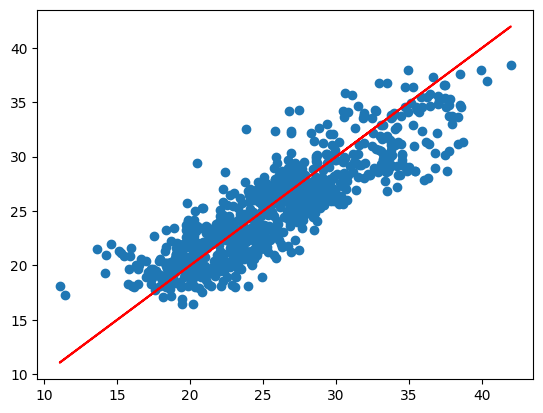

In [ ]:
plt.scatter(obs,lin_pred)
plt.plot(obs,obs,color="r")

In [ ]:
error_avg=[]
for i in range (len(obs)):
  error_avg.append(avg_pred[i]-obs[i])


error_lin=[]
for i in range (len(obs)):
  error_lin.append(lin_pred[i]-obs[i])


error_exp=[]
for i in range (len(obs)):
  error_exp.append(exp_pred[i]-obs[i])

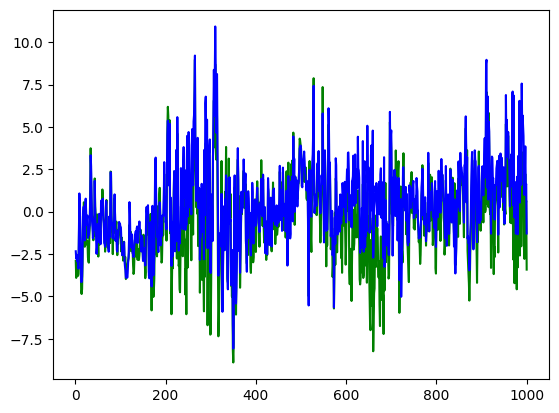

In [ ]:
#plt.scatter(x,error_avg,color="r")
plt.plot(x,error_lin,color="g")
plt.plot(x,error_exp,color="b")

In [ ]:
a=0
b=0
c=0
for i in range(len(error_lin)):
    if abs(error_lin[i])>abs(error_exp[i]):
      a=a+1
    elif abs(error_lin[i])<abs(error_exp[i]):
      b=b+1
    else:
      c=c+1
print(a,b,c)

524 476 0


In [ ]:
lin_pred1=[]
for i in range(len(lin_pred)):
  lin_pred1.append((lin_pred[i])*3)

In [ ]:
exp_pred1=[]
for i in range(len(lin_pred)):
  exp_pred1.append((exp_pred[i])*4)

In [ ]:
print(len(lin_pred1))

1000


In [ ]:
avg_pred1=[]
for i in range(len(lin_pred1)):
  a=(lin_pred1[i]+exp_pred1[i])/7
  avg_pred1.append(a)
print(avg_pred1[4])
print(lin_pred1[4])
print(exp_pred1[4])

26.708261581270133
79.50974344087045
107.44808762802047


In [ ]:
avg_mse1=mean_squared_error(obs,avg_pred1)
print(avg_mse1)
lin_mse=mean_squared_error(obs,lin_pred)
print(lin_mse)
exp_mse=mean_squared_error(obs,exp_pred)
print(exp_mse)
avg_mse=mean_squared_error(obs,avg_pred)
print(avg_mse)

5.2986784488234315
6.257527470589857
5.789082655283889
5.317739495478795


In [ ]:
exp_pred2=[]
for i in range(len(lin_pred)):
  exp_pred2.append((exp_pred[i])*1.1)
avg_pred2=[]
for i in range(len(lin_pred1)):
  a=(lin_pred[i]+exp_pred2[i])/2
  avg_pred2.append(a)

In [ ]:
avg_mse2=mean_squared_error(obs,avg_pred2)
print(avg_mse2)
lin_mse=mean_squared_error(obs,lin_pred)
print(lin_mse)
exp_mse=mean_squared_error(obs,exp_pred)
print(exp_mse)
avg_mse=mean_squared_error(obs,avg_pred)
print(avg_mse)

6.951303959899289
6.257527470589857
5.789082655283889
5.317739495478795


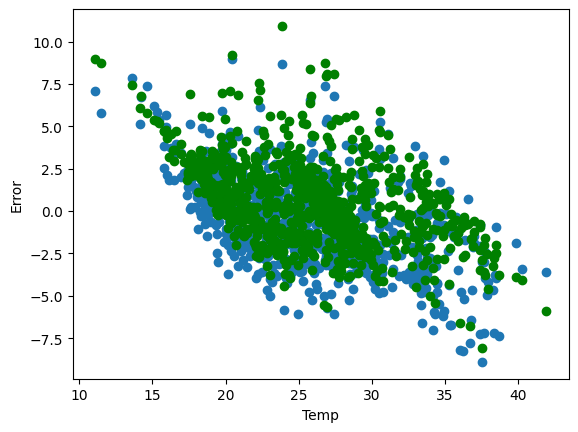

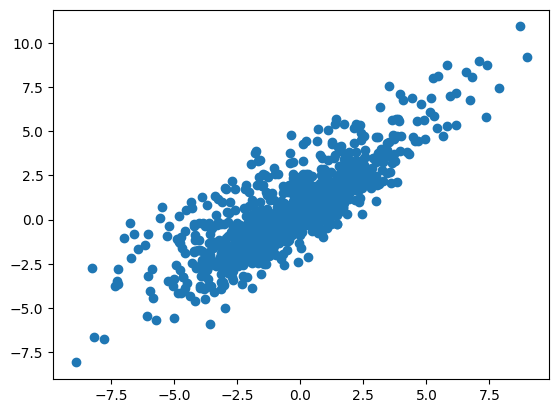

In [ ]:
plt.scatter(obs,error_lin)
#plt.plot(obs,obs,color="r")
plt.scatter(obs,error_exp,color="g")
plt.ylabel("Error")
#plt.plot(obs,obs,color="")
plt.xlabel("Temp")
plt.show()

plt.scatter(error_lin, error_exp)

In [ ]:
set1_len=[]
set1_obs=[]
set1_exp=[]
set1_avg=[]
for i in range(len(obs)):
  if obs[i] <= 20:
    c=obs.index(obs[i])
    set1_len.append(lin_pred[c])
    set1_obs.append(obs[c])
    set1_exp.append(exp_pred[c])
    set1_avg.append(avg_pred[c])
print("lin_mse",mean_squared_error(set1_obs,set1_len))
print("exp_mse",mean_squared_error(set1_obs,set1_exp))
print("avg_mse",mean_squared_error(set1_obs,set1_avg))
print(len(set1_exp))

lin_mse 8.374790870817737
exp_mse 11.632605763198663
avg_mse 9.555096894476579
116


In [ ]:
set2_len=[]
set2_obs=[]
set2_exp=[]
set2_avg=[]
for i in range(len(obs)):
  if obs[i] > 20 and obs[i] <=30 :
    c=obs.index(obs[i])
    set2_len.append(lin_pred[c])
    set2_obs.append(obs[c])
    set2_exp.append(exp_pred[c])
    set2_avg.append(avg_pred[c])
print("lin_mse",mean_squared_error(set2_obs,set2_len))
print("exp_mse",mean_squared_error(set2_obs,set2_exp))
print("avg_mse",mean_squared_error(set2_obs,set2_avg))
print(len(set2_exp))

lin_mse 4.363252084781769
exp_mse 4.668852073111295
avg_mse 3.994358077308046
726


In [ ]:
set3_len=[]
set3_obs=[]
set3_exp=[]
set3_avg=[]
for i in range(len(obs)):
  if obs[i] > 30:
    c=obs.index(obs[i])
    set3_len.append(lin_pred[c])
    set3_obs.append(obs[c])
    set3_exp.append(exp_pred[c])
    set3_avg.append(avg_pred[c])
print("lin_mse",mean_squared_error(set3_obs,set3_len))
print("exp_mse",mean_squared_error(set3_obs,set3_exp))
print("avg_mse",mean_squared_error(set3_obs,set3_avg))
print(len(set3_exp))

lin_mse 13.707503859093409
exp_mse 6.334696414775447
avg_mse 8.389421484332104
158
